<a href="https://colab.research.google.com/github/prachish820/speech-activity-detection/blob/main/PRA1_1_V21078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import math
from scipy.stats import uniform
from sklearn import metrics

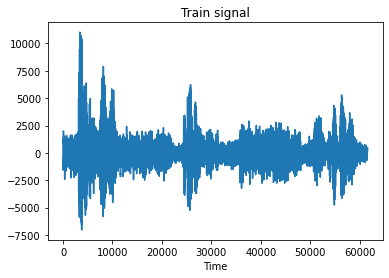

In [ ]:
sample_rate, signal = scipy.io.wavfile.read('/content/drive/MyDrive/PRA_V21078/Q1/Segment2_cafe_noise2.wav')
plt.title("Train signal")
plt.xlabel("Time")
plt.plot(signal)
plt.show()


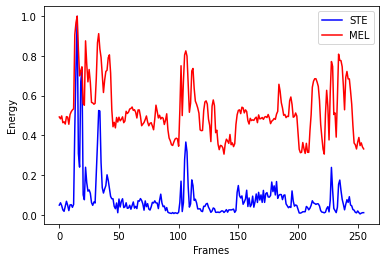

In [ ]:
STEtrain = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q1/Segment2_STEnergy.csv')
MELtrain = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q1/Segment2_MelEnergy.csv')

plt.plot(STEtrain, color='b', label='STE')
plt.plot(MELtrain, color='r', label='MEL')
    
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.legend()
plt.show()


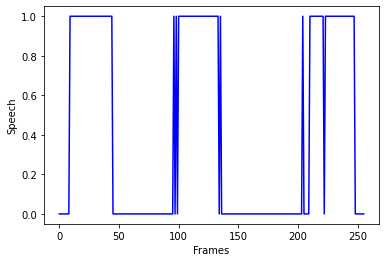

In [ ]:
yTrain = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q1/Segment2_VAD_GT.csv')
plt.plot(yTrain, color='b', label='Speech/Not Speech')
plt.xlabel("Frames")
plt.ylabel("Speech")
plt.show()

In [ ]:
steTrain = np.stack((STEtrain, yTrain), axis=1)


In [ ]:
melTrain = np.stack((MELtrain, yTrain), axis=1)

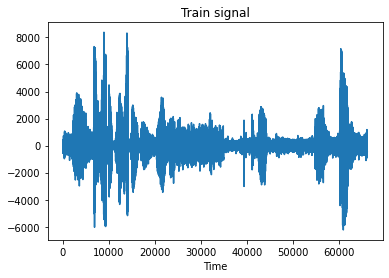

In [ ]:
sample_rate, signal = scipy.io.wavfile.read('/content/drive/MyDrive/PRA_V21078/Q1/Segment3_cafe_noise1.wav')
plt.title("Train signal")
plt.xlabel("Time")
plt.plot(signal)
plt.show()

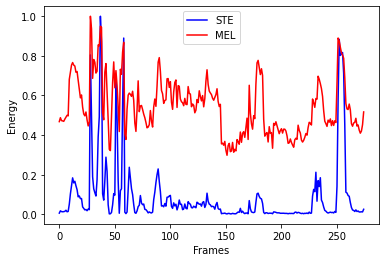

In [ ]:
STEtest = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q1/Segment3_STEnergy.csv')
MELtest = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q1/Segment3_MelEnergy.csv')

plt.plot(STEtest, color='b', label='STE')
plt.plot(MELtest, color='r', label='MEL')

plt.xlabel("Frames")
plt.ylabel("Energy")
plt.legend()
plt.show()

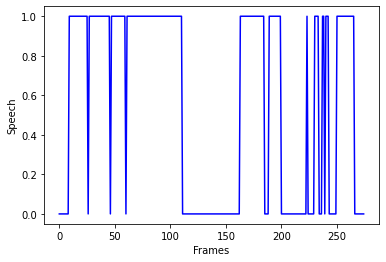

In [ ]:
yTest = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q1/Segment3_VAD_GT.csv')
plt.plot(yTest, color='b', label='Speech/Not Speech')
plt.xlabel("Frames")
plt.ylabel("Speech")
plt.show()

In [ ]:
steTest = np.stack((STEtest, yTest), axis=1)

In [ ]:
melTest = np.stack((MELtrain, yTrain), axis=1)

In [ ]:
def mean(numbers):
    """Returns the mean of numbers"""
    return np.mean(numbers)

In [ ]:
def stdev(numbers):
    """Returns the std_deviation of numbers"""
    return np.std(numbers)

In [ ]:
def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    
    return [fpr, tpr,thresholds]

In [ ]:
def evaluate_algorithm(train_set,test_set,thresholds):
    predicted = naive_bayes(train_set, test_set)
    actual = test_set[:,1]
    (fpr,tpr,thresholds) = roc_curve(actual, predicted,thresholds)
    return [fpr, tpr,thresholds]

In [ ]:
def separate_by_class(dataset):
    separated = {}
    for i in range(len(dataset)):
        row = dataset[i]
        if row[-1] not in separated:
            separated[row[-1]] = []
        separated[row[-1]].append(row)
    return separated

In [ ]:
def model(dataset):
    models = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    models.pop() 
    return models

In [ ]:
def model_by_class(dataset):
    
    separated = separate_by_class(dataset)
    class_models = {}
    for (classValue, instances) in separated.items():
        class_models[classValue] = model(instances)
    del[class_models[0.0]]
    return class_models

In [ ]:
def calculate_pdf(x, mean, stdev):
    if stdev == 0.0:
        if x == mean:
            return 1.0
        else:
            return 0.0
    exponent = (np.pi*stdev) * np.exp(-0.5*((x-mean)/stdev)**2)
    return exponent

In [ ]:
def calculate_class_probabilities(models, input):
    probabilities = []
    for (classValue, classModels) in models.items():
        for i in range(len(classModels)):
            (mean, stdev) = classModels[i]
            x = input[i]
            probabilities.append(calculate_pdf(x, mean, stdev))
    return probabilities


In [ ]:
def getPredictions(models, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = calculate_class_probabilities(models, testSet[i])
        predictions.append(result)
    return predictions

In [ ]:
def naive_bayes(train, test ):
    summaries = model_by_class(train)
    prediction = getPredictions(summaries, test)
    predictions = np.array(prediction)
    return predictions

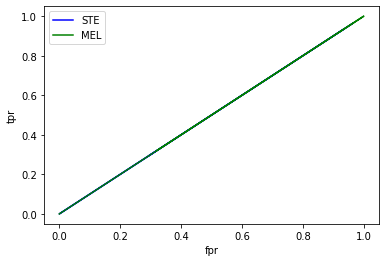

In [ ]:
thresholds = np.random.uniform(0.001, 0.99, 10000)
fpr_ste,tpr_ste,thresholds_ste = evaluate_algorithm(steTrain,steTest,thresholds)
fpr_mel,tpr_mel,thresholds_mel = evaluate_algorithm(melTrain,melTest,thresholds)
plt.plot(fpr_ste,tpr_ste, color='b', label='STE')
plt.plot(fpr_mel,tpr_mel, color='g', label='MEL')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()